In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv
uberData = pd.read_csv('uber-raw-data-jul14.csv')

In [3]:
uberData.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [4]:
#getting rid of the data I was not going to use
uberData.drop(['Lat','Lon'], axis =1)

,Date/Time,Base
0,7/1/2014 0:03:00,B02512
1,7/1/2014 0:05:00,B02512
2,7/1/2014 0:06:00,B02512
3,7/1/2014 0:09:00,B02512
4,7/1/2014 0:20:00,B02512
5,7/1/2014 0:35:00,B02512
6,7/1/2014 0:57:00,B02512
7,7/1/2014 0:58:00,B02512
8,7/1/2014 1:04:00,B02512
9,7/1/2014 1:08:00,B02512


In [5]:
uberData.shape

(796121, 4)

In [6]:
#checking the the type of the column date time
type(uberData.loc[0,'Date/Time'])

str

In [7]:
#converting the date/time column to datetime for easier indexing
uberData['Date/Time'] = pd.to_datetime(uberData['Date/Time'])

In [8]:
#showing that it chaned 
type(uberData.loc[0,'Date/Time'])

pandas._libs.tslibs.timestamps.Timestamp

Text(0, 0.5, 'Amount of rides')

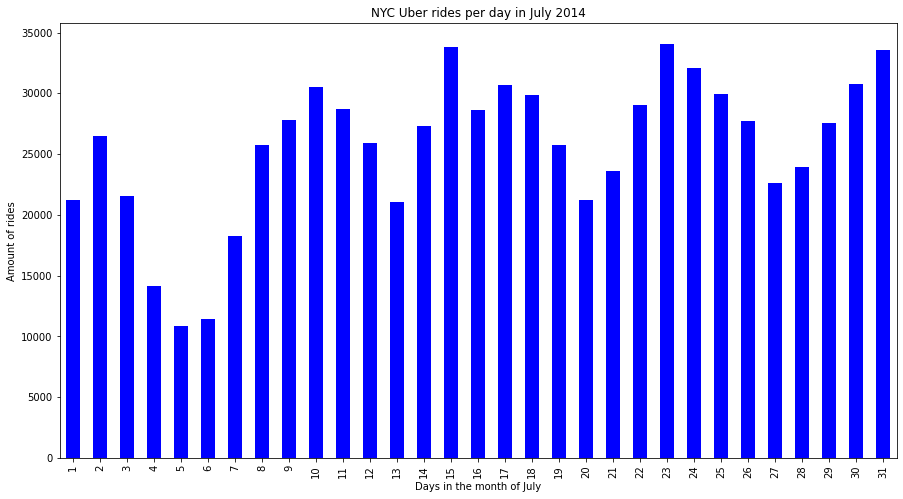

In [9]:
#graphing the amount of rides per day in the month of july in 2014
plt.figure(figsize=(15,8))
#if we we did not make the Date/Time in the dt format we would not be able to do this 
uberData['Date/Time'].dt.day.value_counts().sort_index().plot(kind='bar',color="blue")
plt.title('NYC Uber rides per day in July 2014')
plt.xlabel('Days in the month of July')
plt.ylabel('Amount of rides')

In [10]:
#making the data easier to analyze and graph
uberData['flooredData']=uberData['Date/Time'].dt.floor('15min')
#this will make all the data that below 15 to 0 also below 30 will be become 15 

In [11]:
uberData.head()
#checking the new column and seeing the data has changed

,Date/Time,Lat,Lon,Base,flooredData
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00


Text(0, 0.5, 'Amount of rides')

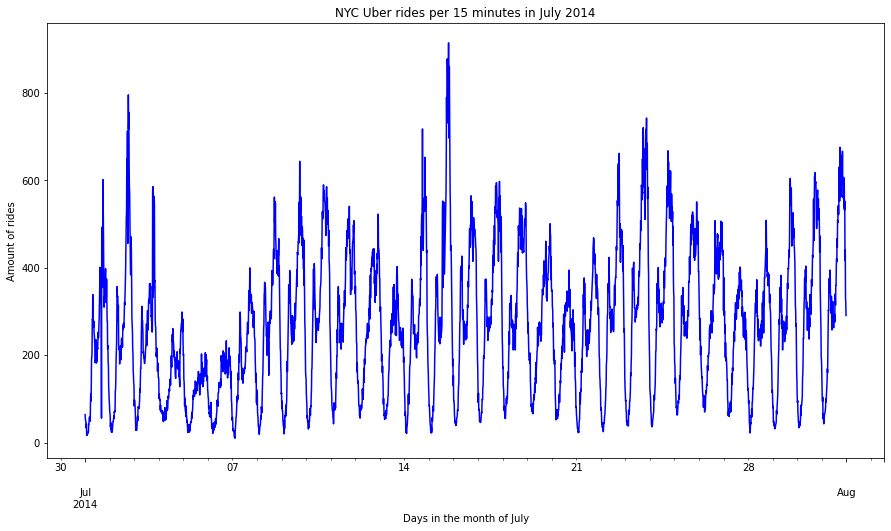

In [12]:
#Plotting all the intervals of 15 mins over the course of the month of july for every day 
plt.figure(figsize=(15,8))
uberData['flooredData'].value_counts().sort_index().plot(c='blue')
plt.title('NYC Uber rides per 15 minutes in July 2014')
plt.xlabel('Days in the month of July')
plt.ylabel('Amount of rides')

In [13]:
uberData['flooredData'].value_counts()

2014-07-15 19:15:00    915
2014-07-15 18:15:00    879
2014-07-15 17:45:00    877
2014-07-15 18:00:00    872
2014-07-15 20:00:00    861
2014-07-15 19:00:00    827
2014-07-15 18:30:00    802
2014-07-02 18:15:00    796
2014-07-15 17:15:00    790
2014-07-15 19:30:00    786
2014-07-15 20:15:00    759
2014-07-02 18:45:00    756
2014-07-15 18:45:00    749
2014-07-23 20:45:00    743
2014-07-15 17:30:00    731
2014-07-23 17:30:00    721
2014-07-02 18:30:00    718
2014-07-14 17:45:00    718
2014-07-23 20:00:00    717
2014-07-02 17:30:00    713
2014-07-02 17:15:00    712
2014-07-23 20:30:00    706
2014-07-15 19:45:00    697
2014-07-23 19:45:00    692
2014-07-23 21:00:00    686
2014-07-23 21:30:00    685
2014-07-31 18:00:00    676
2014-07-02 18:00:00    676
2014-07-23 18:00:00    673
2014-07-24 17:45:00    668
                      ... 
2014-07-22 02:30:00     25
2014-07-09 02:15:00     25
2014-07-01 03:00:00     25
2014-07-01 03:15:00     25
2014-07-02 02:30:00     24
2014-07-05 06:00:00     24
2

In [14]:
#testing
date = uberData.loc[0,'flooredData']
print(date.day_name())

Tuesday


In [15]:
#Getting all the dates to have weekday values 
uberData['dayOfWeek'] = uberData['Date/Time'].dt.day_name()
uberData.head()

,Date/Time,Lat,Lon,Base,flooredData,dayOfWeek
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00,Tuesday
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00,Tuesday
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00,Tuesday
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00,Tuesday
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00,Tuesday


In [16]:
dayData = uberData['dayOfWeek'].value_counts()
dayData

Thursday     148439
Wednesday    147717
Tuesday      137454
Friday       102735
Monday        93189
Saturday      90260
Sunday        76327
Name: dayOfWeek, dtype: int64

In [17]:
days = pd.unique(uberData["dayOfWeek"])

Text(0.5, 1.0, 'Total NYC Uber rides per day in July 2014')

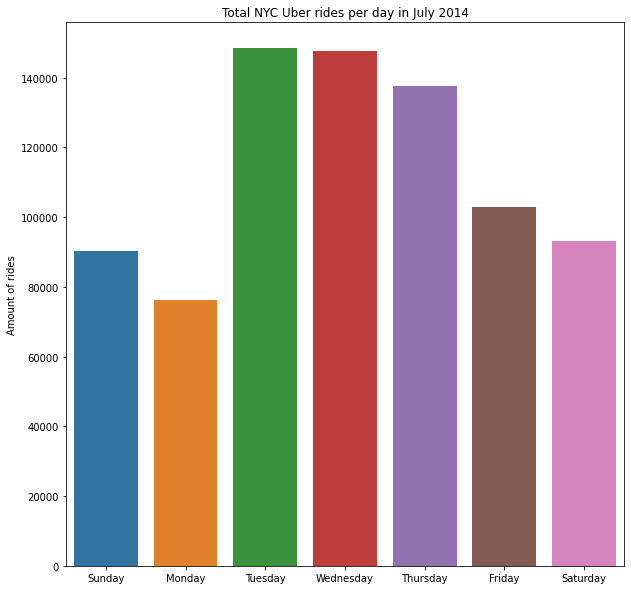

In [18]:
#creating a bar graph to show the amount of rides on each given day
plt.figure(figsize=(10,10))
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = sns.barplot(y = dayData, x = days, order = order)
plt.ylabel('Amount of rides')
plt.title('Total NYC Uber rides per day in July 2014')

In [19]:
uberData.head()

,Date/Time,Lat,Lon,Base,flooredData,dayOfWeek
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00,Tuesday
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00,Tuesday
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00,Tuesday
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00,Tuesday
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00,Tuesday


In [20]:
#Creating a row for just the time of the day
uberData['timeOfDay'] = uberData['Date/Time'].dt.time
uberData.head()

,Date/Time,Lat,Lon,Base,flooredData,dayOfWeek,timeOfDay
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00,Tuesday,00:03:00
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00,Tuesday,00:05:00
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00,Tuesday,00:06:00
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00,Tuesday,00:09:00
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00,Tuesday,00:20:00


In [21]:
#Creating a row for just the date
uberData['date'] = uberData['Date/Time'].dt.date
uberData.head()

,Date/Time,Lat,Lon,Base,flooredData,dayOfWeek,timeOfDay,date
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00,Tuesday,00:03:00,2014-07-01
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00,Tuesday,00:05:00,2014-07-01
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00,Tuesday,00:06:00,2014-07-01
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00,Tuesday,00:09:00,2014-07-01
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00,Tuesday,00:20:00,2014-07-01


In [22]:
#creating a table to count the number of rides
weeklyData = uberData.groupby(['date','dayOfWeek','timeOfDay']).count().dropna().rename(columns={'flooredData':'rides'})['rides'].reset_index()
weeklyData.head()

,date,dayOfWeek,timeOfDay,rides
0,2014-07-01,Tuesday,00:00:00,4
1,2014-07-01,Tuesday,00:01:00,3
2,2014-07-01,Tuesday,00:02:00,4
3,2014-07-01,Tuesday,00:03:00,2
4,2014-07-01,Tuesday,00:04:00,6


In [23]:
weeklyData = weeklyData.groupby(['dayOfWeek','timeOfDay']).mean()['rides']
weeklyData.head()

dayOfWeek  timeOfDay
Friday     00:00:00     16.75
           00:01:00     13.75
           00:02:00     11.50
           00:03:00     10.50
           00:04:00     12.75
Name: rides, dtype: float64

In [24]:
#unstacking data to later create a heatmap
weeklyData= weeklyData.unstack(level=0)
weeklyData.head()

dayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timeOfDay,,,,,,,
00:00:00,16.75,4.75,21.50,19.00,11.0,7.4,9.8
00:01:00,13.75,5.75,23.00,20.25,8.6,5.0,7.4
00:02:00,11.50,7.75,23.25,21.75,9.8,6.4,7.6
00:03:00,10.50,6.00,18.00,18.75,8.6,4.2,5.0
00:04:00,12.75,5.75,23.25,18.00,9.4,6.6,6.4


Text(0.5, 1.0, 'Heatmap of average rides in time')

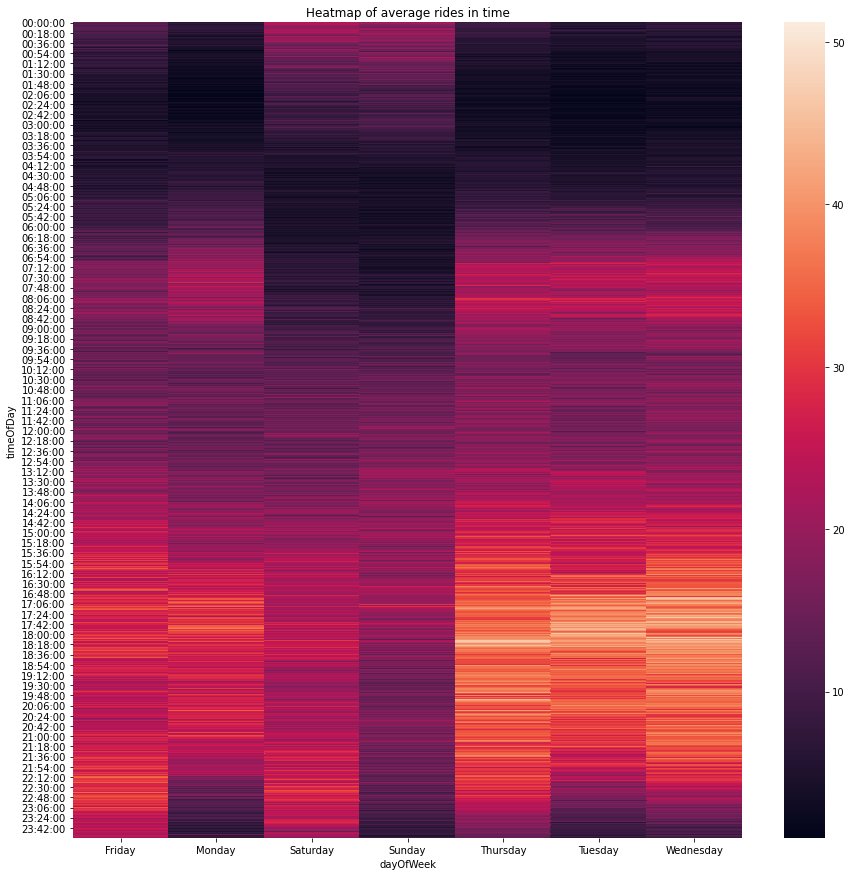

In [25]:
#Issue here is that its not in oder so the map is not quite what we are looknig for 
plt.figure(figsize=(15,15))
sns.heatmap(weeklyData)
plt.title('Heatmap of average rides in time')

In [26]:
weeklyData.head()

dayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
timeOfDay,,,,,,,
00:00:00,16.75,4.75,21.50,19.00,11.0,7.4,9.8
00:01:00,13.75,5.75,23.00,20.25,8.6,5.0,7.4
00:02:00,11.50,7.75,23.25,21.75,9.8,6.4,7.6
00:03:00,10.50,6.00,18.00,18.75,8.6,4.2,5.0
00:04:00,12.75,5.75,23.25,18.00,9.4,6.6,6.4


In [27]:
#Ordering the columns
weeklyData = weeklyData.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weeklyData.head()

dayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
timeOfDay,,,,,,,
00:00:00,4.75,7.4,9.8,11.0,16.75,21.50,19.00
00:01:00,5.75,5.0,7.4,8.6,13.75,23.00,20.25
00:02:00,7.75,6.4,7.6,9.8,11.50,23.25,21.75
00:03:00,6.00,4.2,5.0,8.6,10.50,18.00,18.75
00:04:00,5.75,6.6,6.4,9.4,12.75,23.25,18.00


In [28]:
weeklyData.mean()

dayOfWeek
Monday       16.220023
Tuesday      19.128438
Wednesday    20.543472
Thursday     20.640729
Friday       17.846065
Saturday     15.705961
Sunday       13.285069
dtype: float64

Text(0.5, 1.0, 'Heatmap of the average amount of rides at specific times during each day of the week')

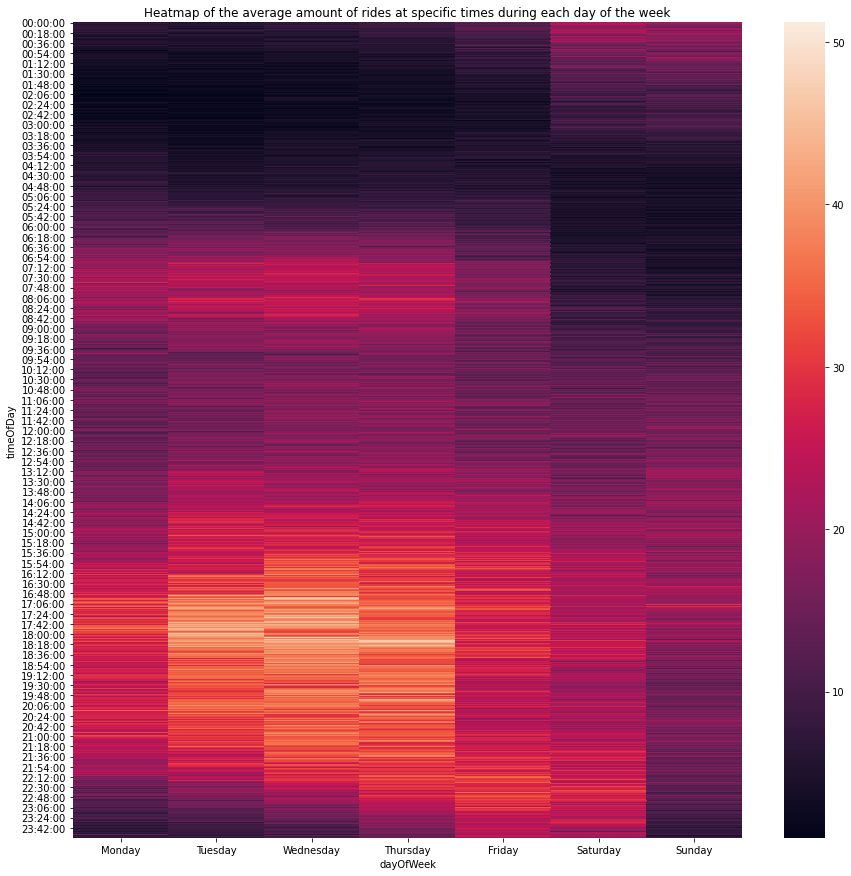

In [29]:
#fixed the order 
plt.figure(figsize=(15,15))
sns.heatmap(weeklyData)
plt.title('Heatmap of the average amount of rides at specific times during each day of the week')

<Figure size 1080x864 with 0 Axes>

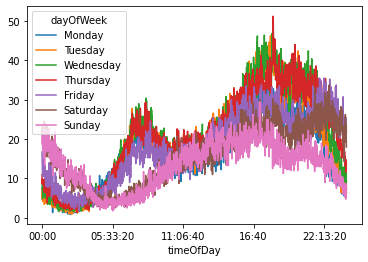

In [30]:
#plotting the time of the day and averages of amount of rides per day
plt.figure(figsize=(15,12))
weeklyData.plot(kind="line")